In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D

#imposto i seed per la replicabilità
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

#lista di optimizers
optimizers = [SGD(), Adam(), Adagrad(), RMSprop(), Adamax(), Nadam()]
optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]

#dimensioni dell'immagine di input
img_rows, img_cols = 28, 28 # numero di pixels
# output
num_classes = 10 # 10 digits

#dati di validazione e allenamento
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#cambio la forma dei dati di input da (60000,28,28) a (60000,28,28,1), CNN vuole infatti il numero di canali, in questo caso 1(l'immagine è in scala di grigi)
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#trasforma i numeri interi delle etichette in vettori binari (one-hot)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def create_CNN():
    # inizializzo il modello
    model = Sequential()
    # primo convutional layer con 10 filtri 5X5
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #primo output 24X24X10
    model.add(MaxPooling2D(pool_size=(2, 2)))#riduce ogni dimensione spaziale di 2
    #secondo output 12X12X10

    #secondo convutional layer con 20 filtri 5X5
    model.add(Conv2D(20, kernel_size=(5, 5),
                     activation='relu'))
    #terzo output 8X8X20
    model.add(MaxPooling2D(pool_size=(2, 2)))#riduce ogni dimensione spaziale di 2
    #quarto output 4X4X20

    #aggiunta layer DNN
    model.add(Flatten())  # da (4,4,20) a vettore di dimensione 4*4*20=320

    #primo layer DNN
    model.add(Dense(4*4*20, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    #secondo layer DNN
    model.add(Dense(160, activation='relu'))
    #output layer con softmax. Softmax trasforma i valori grezzi in probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
#compilazione del modello
def compile_model(opt_suffix):
    model=create_CNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt_suffix,
                  metrics=['acc'])
    return model

0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1
2
3
4
5


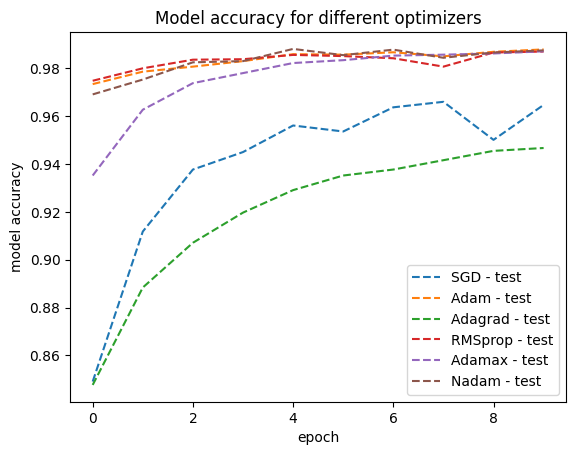

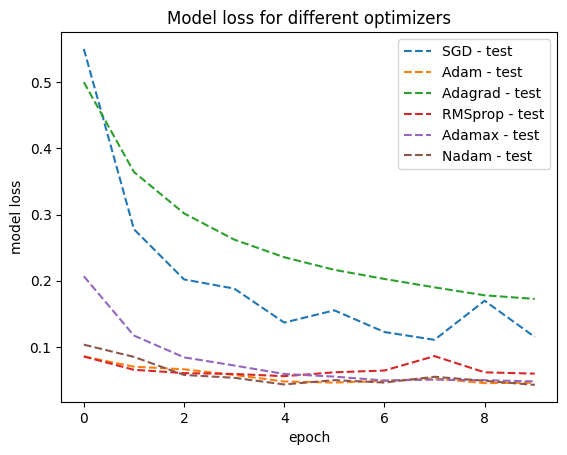

In [ ]:
# parametri di addestramento
batch_size = 64
epochs = 10

# Per salvare gli history
histories = {}

for i in range(6):
    print(i)
    # creo la rete neurale con optimizer differenti
    model_CNN = compile_model(optimizers[i])

    # addestramento dei DNN
    history = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

    #salvo gli history
    histories[optimizer_names[i]] = history


# plotto l'accuracy di ogni optimizer sui validation data
plt.figure()
for name in optimizer_names:
    plt.plot(histories[name].history['val_acc'], linestyle='--', label=f'{name} - test')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model accuracy for different optimizers")
plt.show()

plt.clf()

# plotto la loss di ogni optimizer sui training data
for name in optimizer_names:
    plt.plot(histories[name].history['val_loss'], linestyle='--', label=f'{name} - test')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model loss for different optimizers")
plt.show()


# Esercizio 12.2
Gli andamenti della loss e dell'accuracy per i vari optimizers sono gli stessi osservati nell'esercizio 12.1.

Si osserva, a parità di epoche, una loss e un'accuracy migliore per ogni optimizer rispetto alla rete DNN. Questo perchè la CNN grazie a layer convoluzionali e di pooling riesce a catturare pattern locali e preservarli più efficacemente rispetto alla DNN. Vede l'immagine in modo più sofisticato e "intelligente". La DNN invece tratta l’immagine come un lungo vettore, senza considerare la posizione o la struttura dei pixel.